In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from scipy.sparse import hstack, csr_matrix

In [6]:
df = pd.read_csv("../../csv_files/reddit_controversal_df_features.csv")

TEXT_COL = "text_clean"
LABEL_COL = "controversial_flag"
# Set aside numeric features
NUM_COLS = [
    "comment_upvote_ratio", "sentiment"   
]

use_cols = [TEXT_COL, LABEL_COL] + NUM_COLS
df_model = df[use_cols].dropna().copy()

#df_model.head()


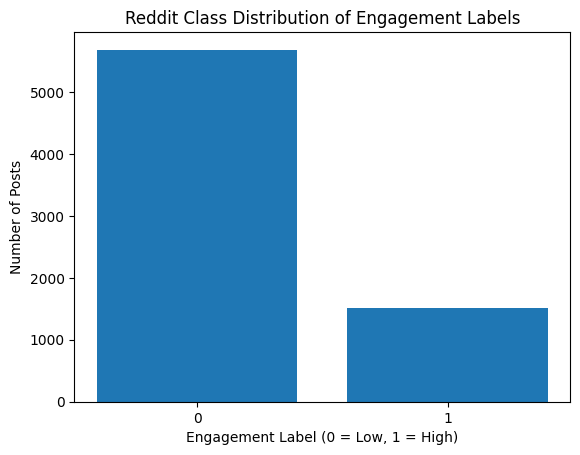

In [10]:

import matplotlib.pyplot as plt

counts = df[LABEL_COL].value_counts().sort_index()

plt.figure()
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("Engagement Label (0 = Low, 1 = High)")
plt.ylabel("Number of Posts")
plt.title("Reddit Class Distribution of Engagement Labels")
plt.show()


In [8]:
X_train_df, X_test_df = train_test_split(
    df_model,
    test_size=0.2,
    random_state=42,
    stratify=df_model[LABEL_COL]
)

y_train = X_train_df[LABEL_COL].astype(int).values
y_test  = X_test_df[LABEL_COL].astype(int).values


tfidf = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1, 2),
    min_df=2
)

X_train_text = tfidf.fit_transform(X_train_df[TEXT_COL])
X_test_text  = tfidf.transform(X_test_df[TEXT_COL])

X_train_num = csr_matrix(X_train_df[NUM_COLS].astype(float).values)
X_test_num  = csr_matrix(X_test_df[NUM_COLS].astype(float).values)

scaler = StandardScaler(with_mean=False)
X_train_num = scaler.fit_transform(X_train_num)
X_test_num  = scaler.transform(X_test_num)

X_train = hstack([X_train_text, X_train_num])
X_test  = hstack([X_test_text, X_test_num])

log_reg = LogisticRegression(
    max_iter=1000,
    solver="liblinear",
    class_weight="balanced",
    random_state=42
)

log_reg.fit(X_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [9]:
y_pred = log_reg.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.61      0.67      1137
           1       0.13      0.22      0.16       304

    accuracy                           0.52      1441
   macro avg       0.44      0.41      0.41      1441
weighted avg       0.61      0.52      0.56      1441

